# SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/069818d1-0e5c-4d87-a461-0de584ab9c33/Untitled_(33).png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/069818d1-0e5c-4d87-a461-0de584ab9c33/Untitled_(33).png)

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

### Как выполнить задание?

- Опишите цели исследования;
- Исследуйте таблицы — выведите первые строки;
- Сделайте по одному SQL-запросу для решения каждого задания;
- Выведите результат каждого запроса в тетрадке;
- Опишите выводы по каждой из решённых задач.    

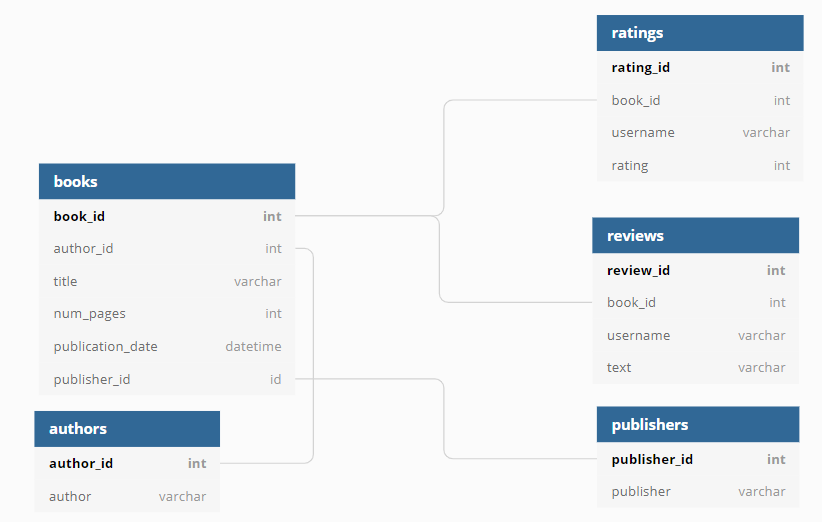

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {
    "user": "praktikum_student",  # имя пользователя
    "pwd": "Sdf4$2;d-d30pp",  # пароль
    "host": "rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net",
    "port": 6432,  # порт подключения
    "db": "data-analyst-final-project-db",
}  # название базы данных
connection_string = "postgresql://{}:{}@{}:{}/{}".format(
    db_config["user"],
    db_config["pwd"],
    db_config["host"],
    db_config["port"],
    db_config["db"],
)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={"sslmode": "require"})

In [3]:
def read(sql):
    return pd.io.sql.read_sql(sql, con=engine)

In [4]:
books = """ SELECT * FROM books"""
authors = """ SELECT * FROM authors"""
publishers = """ SELECT * FROM publishers"""
rating = """ SELECT * FROM ratings"""
reviews = """ SELECT * FROM reviews"""

### books

In [5]:
books_raw = read(books)

In [6]:
books_raw.to_csv("books_raw.csv", index=False)

books_raw.head(5)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [7]:
books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [9]:
books_raw.duplicated().sum()

0

### authors

In [10]:
authors_raw = pd.io.sql.read_sql(authors, con=engine)

In [11]:
 authors_raw.to_csv('authors_raw.csv', index = False)

 authors_raw.head(5)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [12]:
 authors_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [13]:
 authors_raw.duplicated().sum()

0

### publishers

In [14]:
publishers_raw = pd.io.sql.read_sql(publishers, con=engine)

In [15]:
publishers_raw.to_csv("publishers_raw.csv", index=False)

publishers_raw.head(5)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [16]:
publishers_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [17]:
publishers_raw.duplicated().sum()

0

### rating

In [18]:
rating_raw = pd.io.sql.read_sql(rating, con=engine)

In [19]:
rating_raw.to_csv("rating_raw.csv", index=False)

rating_raw.head(5)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [20]:
rating_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [21]:
rating_raw.duplicated().sum()

0

### reviews

In [22]:
reviews_raw = pd.io.sql.read_sql(reviews, con=engine)

In [23]:
reviews_raw.to_csv("reviews_raw.csv", index=False)

reviews_raw.head(5)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [24]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [25]:
reviews_raw.duplicated().sum()

0

## Задания

* **Посчитайте, сколько книг вышло после 1 января 2000 года;**

In [26]:
quantity = """
         SELECT COUNT(b.book_id)
         FROM books as b
         WHERE CAST(b.publication_date as date) >'2000-01-01'
"""

In [27]:
read(quantity)

,count
0,819


 **После  1 января 2000 года вышло 819 книг**

* **Для каждой книги посчитайте количество обзоров и среднюю оценку;**

In [28]:
book_avg = """
         WITH
             bk as (
         SELECT b.book_id,
                b.title,
                COUNT(re.review_id) as count
         FROM books as b
         LEFT JOIN reviews as re ON b.book_id=re.book_id
         GROUP BY b.book_id
         ORDER BY count DESC),
             rt as(
         SELECT book_id,
                AVG(rating) as rat
         FROM ratings
         GROUP BY book_id
         ORDER BY rat DESC)
         SELECT bk.title,
                bk.count,
                rt.rat
         FROM bk LEFT JOIN rt ON bk.book_id=rt.book_id 
         GROUP BY bk.title,bk.count,rt.rat
         ORDER BY bk.count desc
         LIMIT 10

"""
read(book_avg)

,title,count,rat
0,Twilight (Twilight #1),7,3.662500
1,Eat Pray Love,6,3.395833
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,Outlander (Outlander #1),6,4.125000
...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
996,Essential Tales and Poems,0,4.000000
997,Leonardo's Notebooks,0,4.000000
998,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000


**Больше всего обзоров-7 вышло на книгу Twilight (Twilight #1) со средним рейтингом 3.66** 

* **Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;**

In [29]:
publish = """
         SELECT distinct(p.publisher) as publ,
                count(b.book_id) as book
         FROM  books as b
         LEFT JOIN publishers as p on b.publisher_id = p.publisher_id
         WHERE b.num_pages > 50
         GROUP BY publ
         ORDER BY book desc
         LIMIT 10

"""
read(publish)

,publ,book
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


**Издательство Penguin Books выпустило наибольшее число книг-42 шт с числом страниц больше 50**

* **Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;**

In [30]:
author = """
       SELECT a.author,
       AVG(rt.rating)
       FROM authors as a
       LEFT JOIN books as b on b.author_id = a.author_id
       LEFT JOIN ratings as rt on b.book_id = rt.book_id
       WHERE b.book_id in
                    (SELECT b.book_id
                     FROM books b
                     LEFT JOIN ratings as rt on b.book_id = rt.book_id
                     GROUP BY b.book_id
                     HAVING count(rt.rating) >= 50) 
      GROUP BY a.author
      ORDER BY avg(rt.rating) desc
"""
read(author)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.246914
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Lois Lowry,3.750000


**Автор J.K. Rowling/Mary GrandPré имеет самую высокую среднию оценку книг в 4.29, с учетом только книг с 50 и более оценками.**

* **Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.**

In [31]:
mean_reviews = """
               SELECT AVG(re)
               FROM (
               
                      SELECT COUNT(review_id) as re
                             FROM reviews
                      WHERE username in (
                
                             SELECT username
                             FROM ratings 
                             GROUP BY  username
                             HAVING count(rating_id)>50
                      )
               
                       GROUP BY username
                       ) as top
"""

read(mean_reviews)

,avg
0,24.333333


**Среднее количество  обзоров от пользователей, которые поставили больше 50 оценок-24**

### ВЫВОДЫ   
* **После  1 января 2000 года вышло 819 книг из 1000**    
* **Больше всего обзоров-7 вышло на книгу Twilight (Twilight #1) со средним рейтингом 3.66** 
* **Издательство Penguin Books выпустило наибольшее число книг-42 шт с числом страниц больше 50**   
* **Автор J.K. Rowling/Mary GrandPré имеет самую высокую среднию оценку книг в 4.29, с учетом только книг с 50 и более оценками.**    
* **Среднее количество  обзоров от пользователей, которые поставили больше 50 оценок-24**
